---
title: "CO2flux_comparison"
author: "cciscato"
date: "15/02/2023"
format: 
  html:
    embed-resources: true
    theme:
              light: flatly
              dark: darkly
    toc: true
    code-fold: true
execute:
  warning: false
jupyter: python3
---

In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [4]:
dataset = (r'/Volumes/UnionSine/data_transfer/ssp126/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [5]:
dataset_oae = (r'/Volumes/UnionSine/data_transfer/ssp126/CO2flux_CDR_EU_coast_ssp126_1m.nc')
data_oae = xr.open_dataset(dataset_oae)

### EU Seasonal Average of CO2 Flux from 2015 to 2100 with and without OAE

In [6]:
sliced_data_baseline = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_data_oae = data_oae.where((-25 < data_oae.nav_lon) & (data_oae.nav_lon < 10) & (35 < data_oae.nav_lat) & (data_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [8]:
sliced_data_baseline_plot = sliced_data_baseline.co2flux_cpl.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [9]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

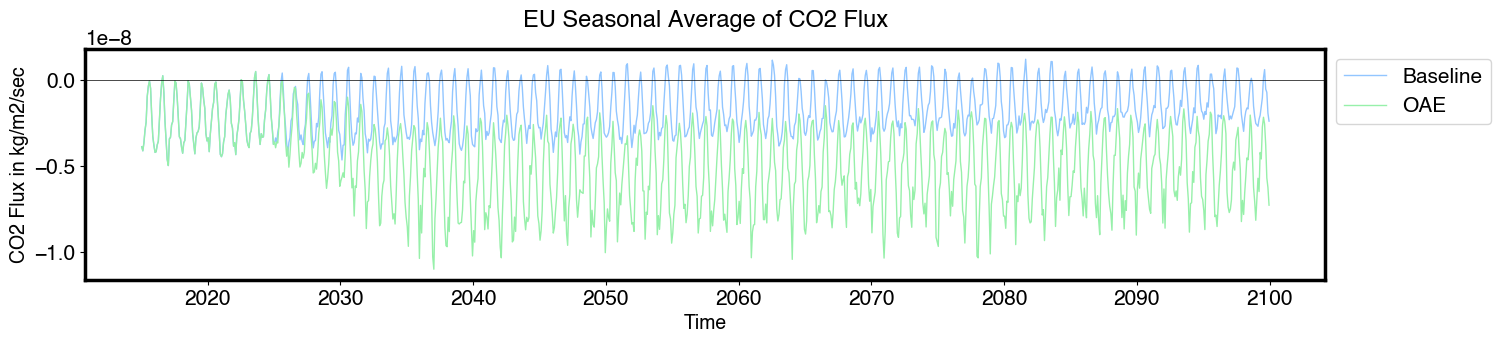

In [10]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.co2flux_cpl, linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.co2flux_cpl, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of CO2 Flux', fontname="Helvetica", fontsize=17, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### EU Seasonal Average of CO2 Flux from 2090 to 2100 with and without OAE

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))

In [12]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

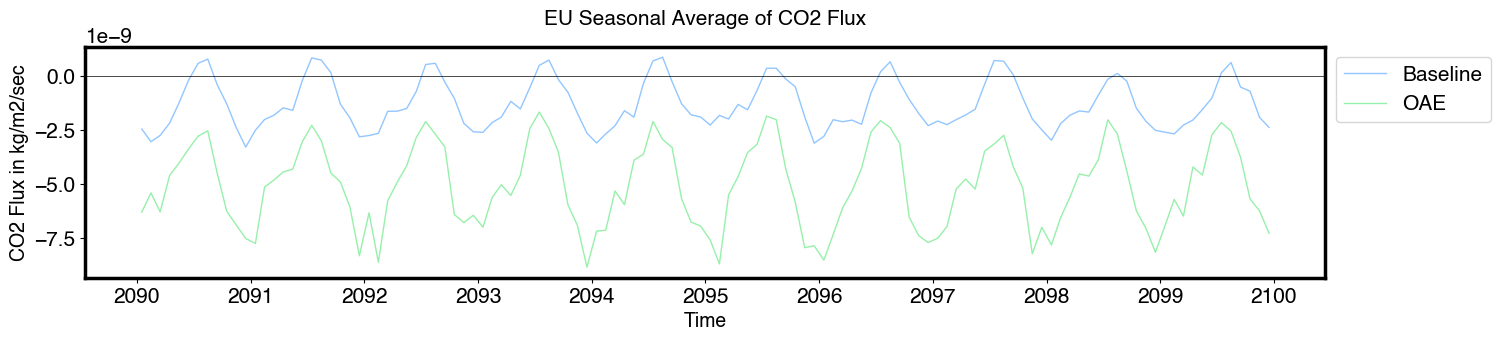

In [13]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.co2flux_cpl, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.co2flux_cpl, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of CO2 Flux', fontsize=15, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Unweighted EU Seasonal Average of CO2 Flux from 2090 to 2100 with and without OAE

In [14]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_baseline = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [15]:
co2flux_season_summary_baseline = co2_flux_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_baseline = co2_flux_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
co2flux_seasonal_mean_baseline = co2flux_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_oae = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [17]:
co2flux_season_summary_oae = co2_flux_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_oae = co2_flux_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
co2flux_seasonal_mean_oae = co2flux_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


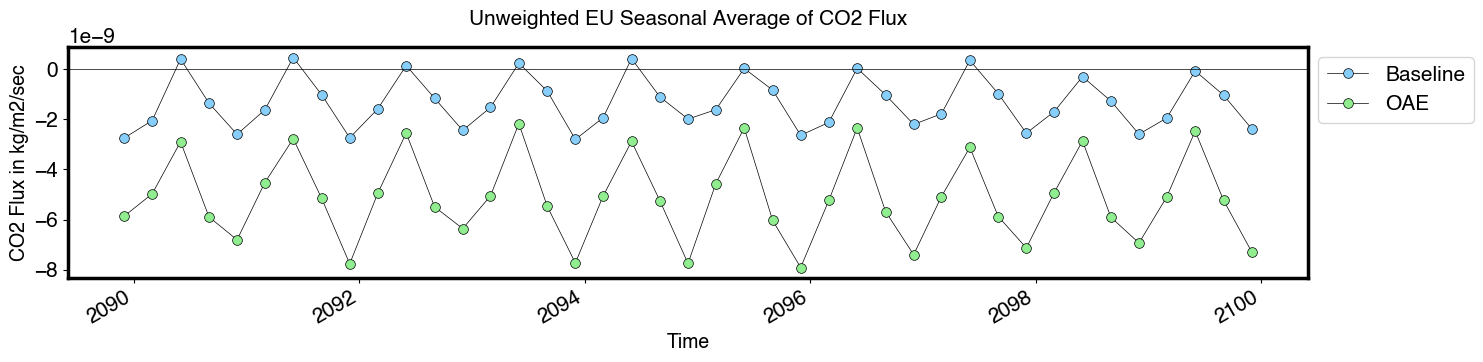

In [18]:
f, ax = plt.subplots(figsize=(16, 3))

co2flux_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of CO2 Flux", fontsize= 15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Weighted EU Seasonal Average of CO2 Flux from 2090 to 2100 with and without OAE

In [19]:
month_length_baseline = co2_flux_baseline.time_counter.dt.days_in_month
co2flux_weighted_mean_baseline = ((co2_flux_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_baseline = co2flux_weighted_mean_baseline.where(co2flux_weighted_mean_baseline)
co2flux_weighted_season_baseline = co2flux_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [20]:
month_length_oae = co2_flux_oae.time_counter.dt.days_in_month
co2flux_weighted_mean_oae = ((co2_flux_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_oae = co2flux_weighted_mean_oae.where(co2flux_weighted_mean_oae)
co2flux_weighted_season_oae = co2flux_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

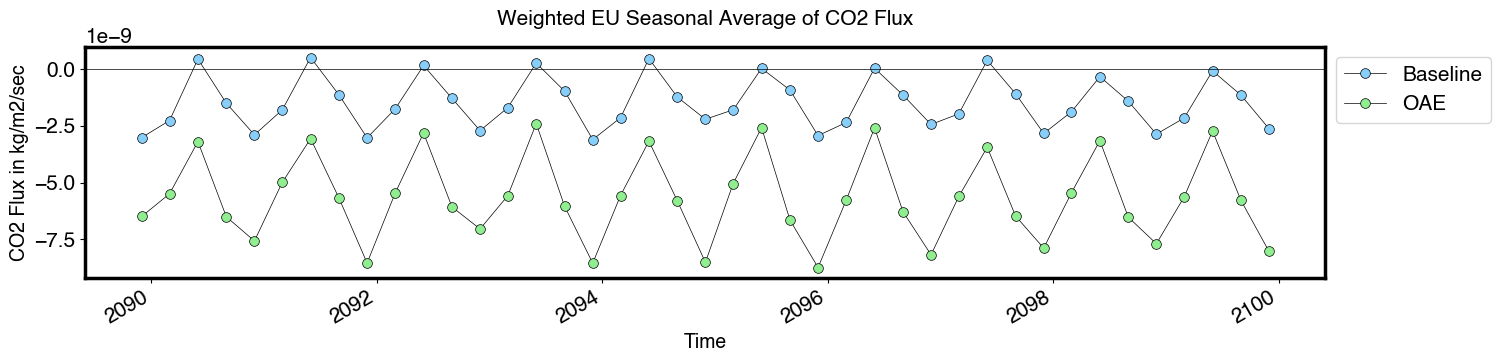

In [21]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(16, 3))
co2flux_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### Weighted EU Seasonal Average of CO2 Flux from 2090 to 2100 with and without OAE

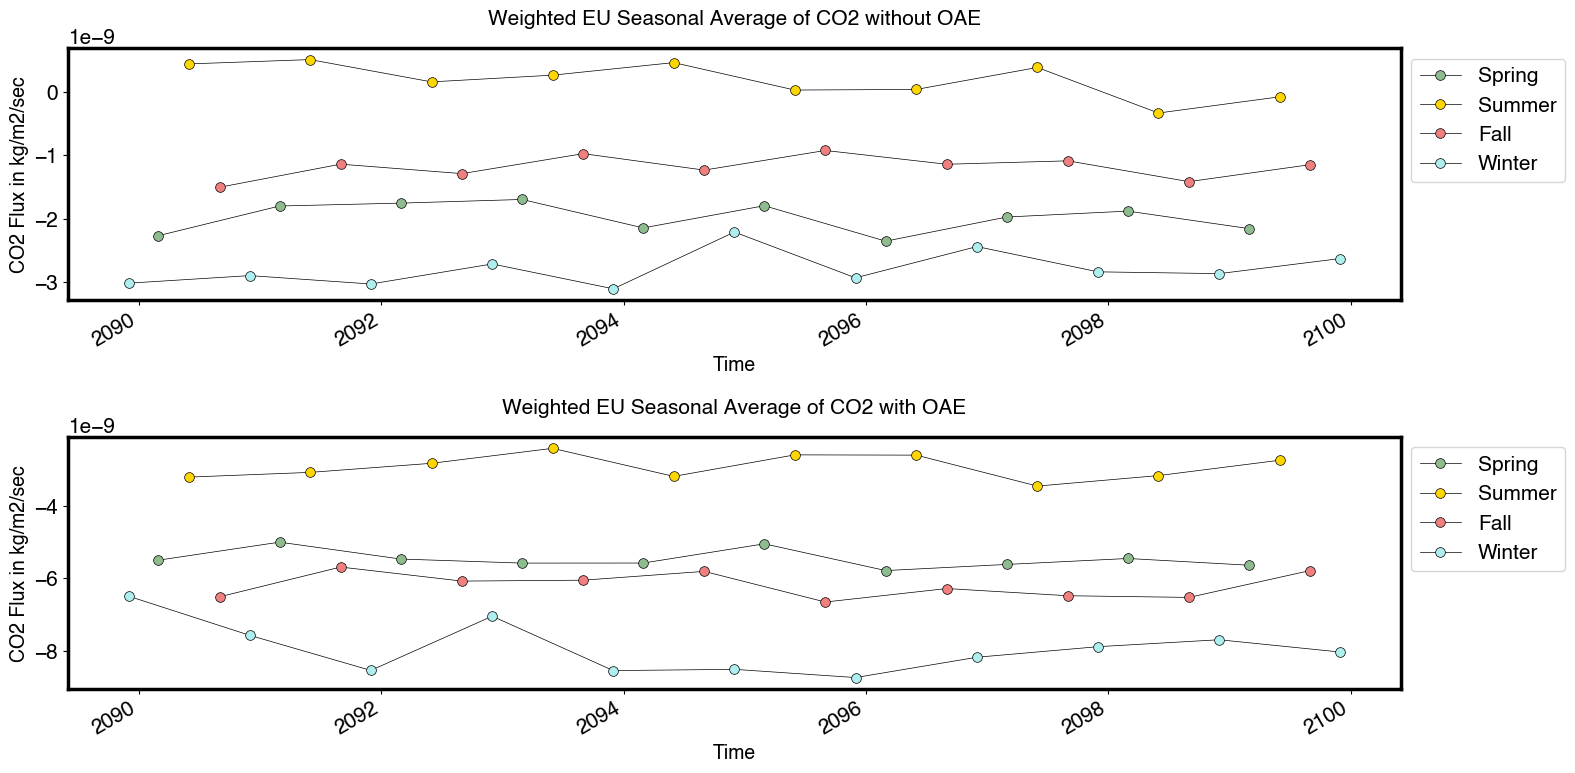

In [22]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in co2flux_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)

for month, arr in co2flux_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of CO2 Flux from 2090 to 2100 without OAE

In [23]:
co2flux_weighted_baseline = co2flux_weighted_season_baseline.to_dataframe('CO2_Flux')
co2flux_weighted_baseline['Month'] = pd.DatetimeIndex(co2flux_weighted_baseline.index).month

In [24]:
conditions = [
    (co2flux_weighted_baseline['Month'] == 3),
    (co2flux_weighted_baseline['Month'] == 6),
    (co2flux_weighted_baseline['Month'] == 9),
    (co2flux_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_baseline['Month'] = np.select(conditions, values)

In [25]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

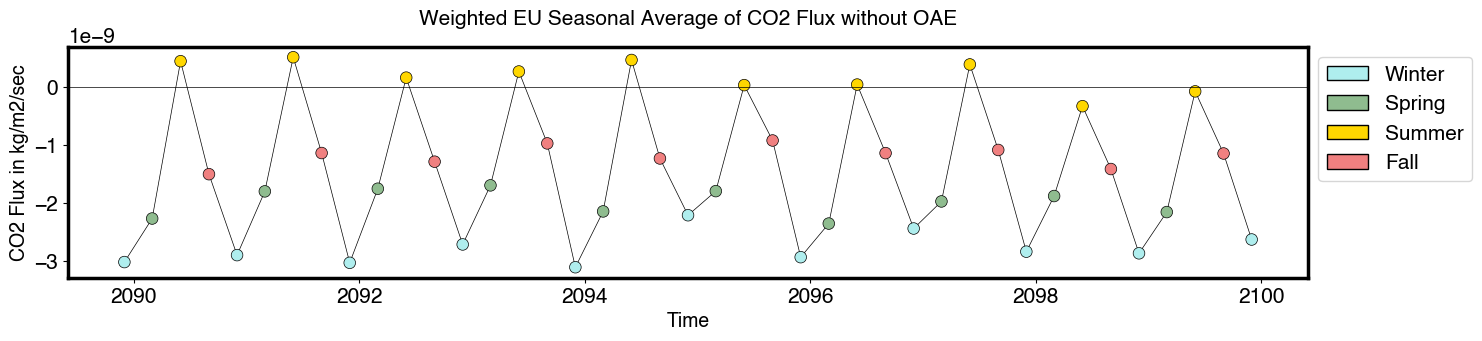

In [26]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux without OAE", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### Weighted EU Seasonal Average of CO2 Flux from 2090 to 2100 with OAE

In [27]:
co2flux_weighted_oae = co2flux_weighted_season_oae.to_dataframe('CO2_Flux')
co2flux_weighted_oae['Month'] = pd.DatetimeIndex(co2flux_weighted_oae.index).month

In [28]:
conditions = [
    (co2flux_weighted_oae['Month'] == 3),
    (co2flux_weighted_oae['Month'] == 6),
    (co2flux_weighted_oae['Month'] == 9),
    (co2flux_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_oae['Month'] = np.select(conditions, values)

In [29]:
colors = dict(zip(co2flux_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

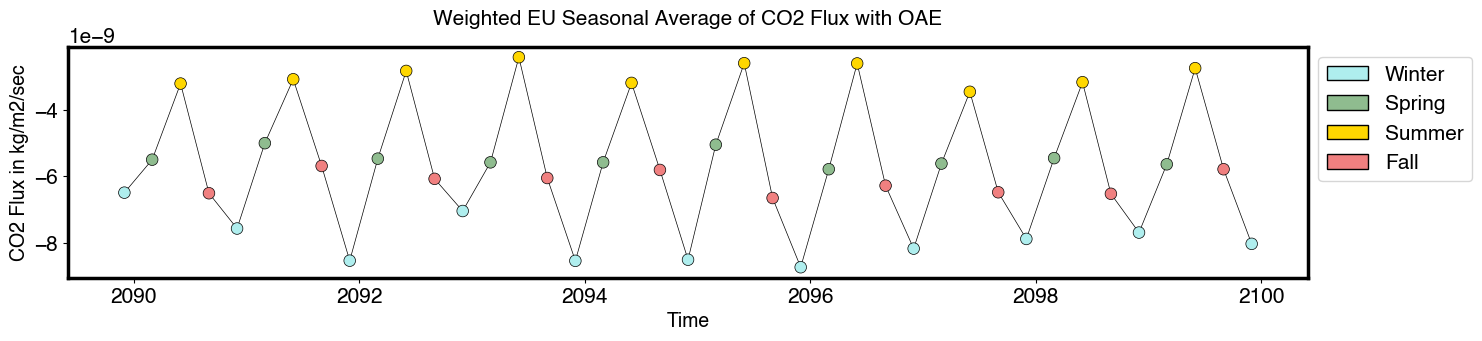

In [30]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux with OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of CO2 Flux from 2090 to 2100 with and without OAE 

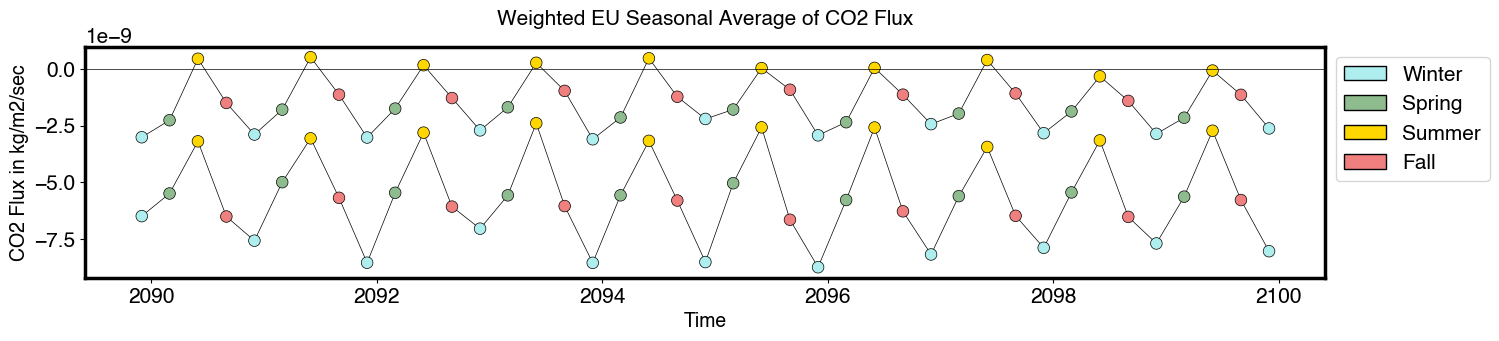

In [31]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### EU Monthly Averaged CO2 Flux for the last 10 years with and without OAE

In [32]:
mean_baseline = (sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).co2flux_cpl.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [33]:
mean_oae = (sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).co2flux_cpl.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

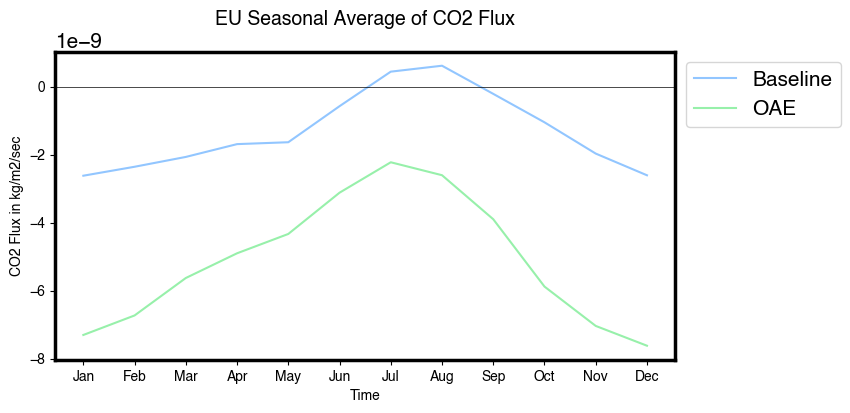

In [34]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.co2flux_cpl, label='Baseline')
plt.plot(mean_oae.co2flux_cpl, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel("Time", fontsize=10)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of CO2 Flux', fontname="Helvetica", fontsize=14, y=1.06)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### EU Seasonal Average of CO2 Flux from 2090 to 2100 without OAE

In [35]:
month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [36]:
weights_baseline = weights_baseline.to_dataset()

In [37]:
ds_weighted_baseline = (sliced_frame_baseline.co2flux_cpl * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='co2flux_cpl')
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

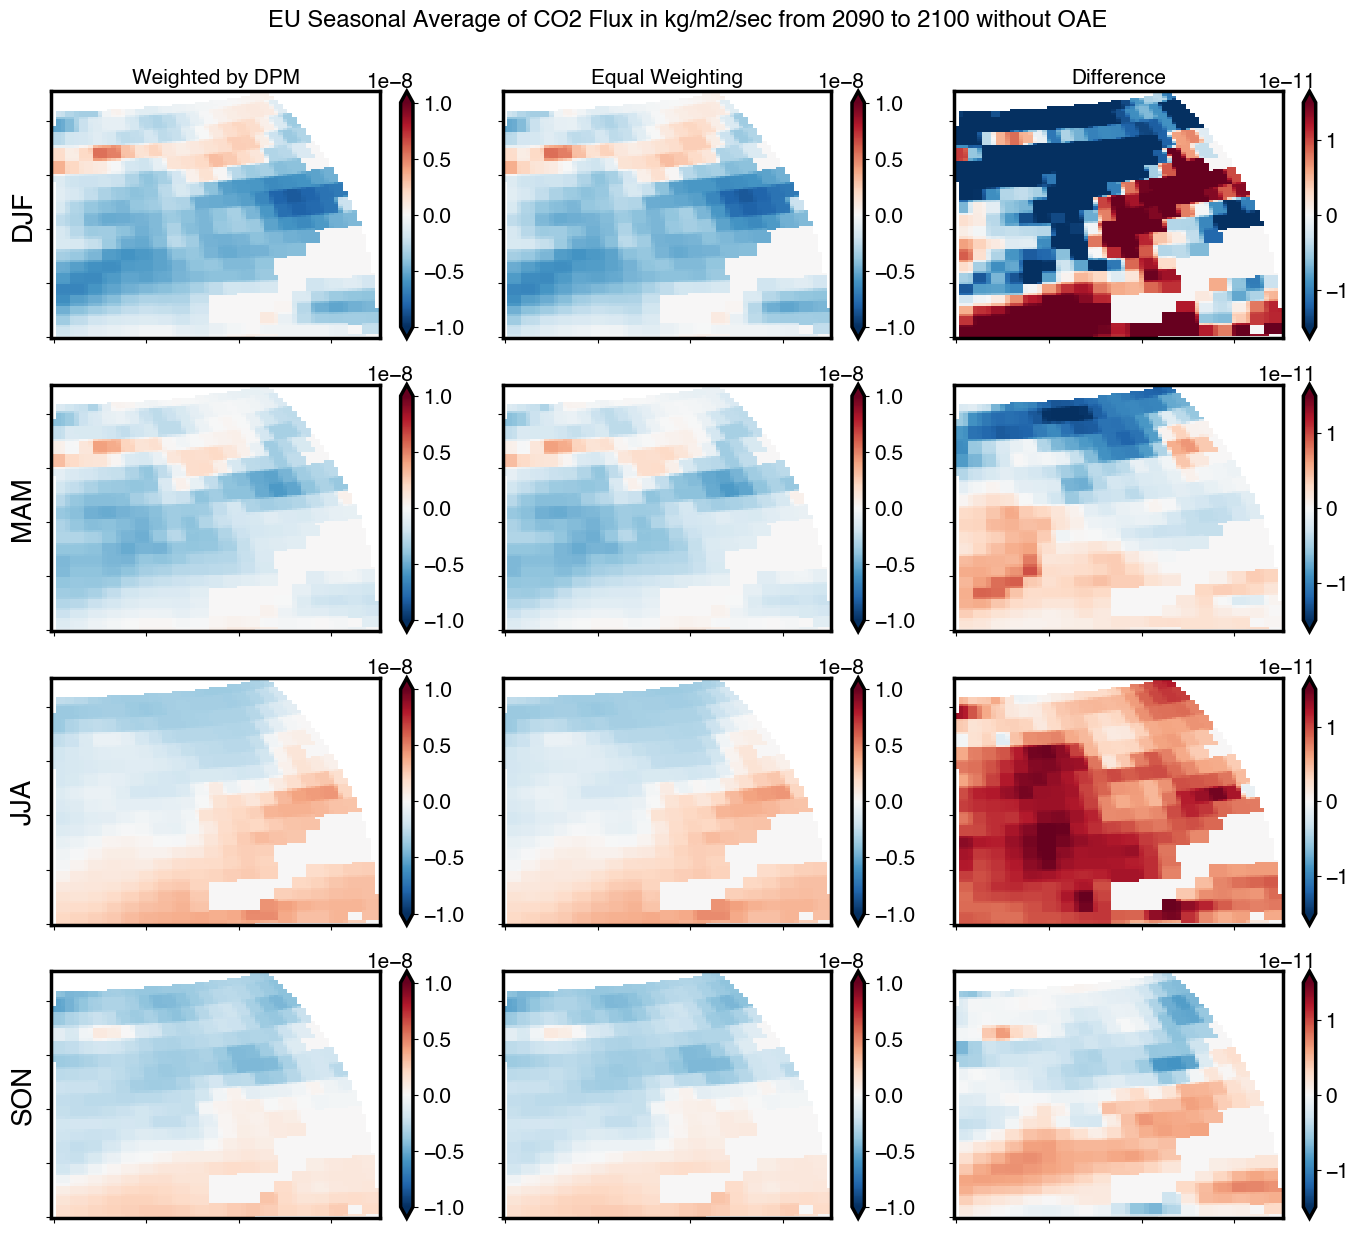

In [38]:
notnull = pd.notnull(ds_unweighted_baseline["co2flux_cpl"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.000000000015,
        vmax=0.000000000015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of CO2 Flux from 2090 to 2100 with OAE

In [39]:
month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [40]:
weights_oae = weights_oae.to_dataset()

In [41]:
ds_weighted_oae = (sliced_frame_oae.co2flux_cpl * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='co2flux_cpl')
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

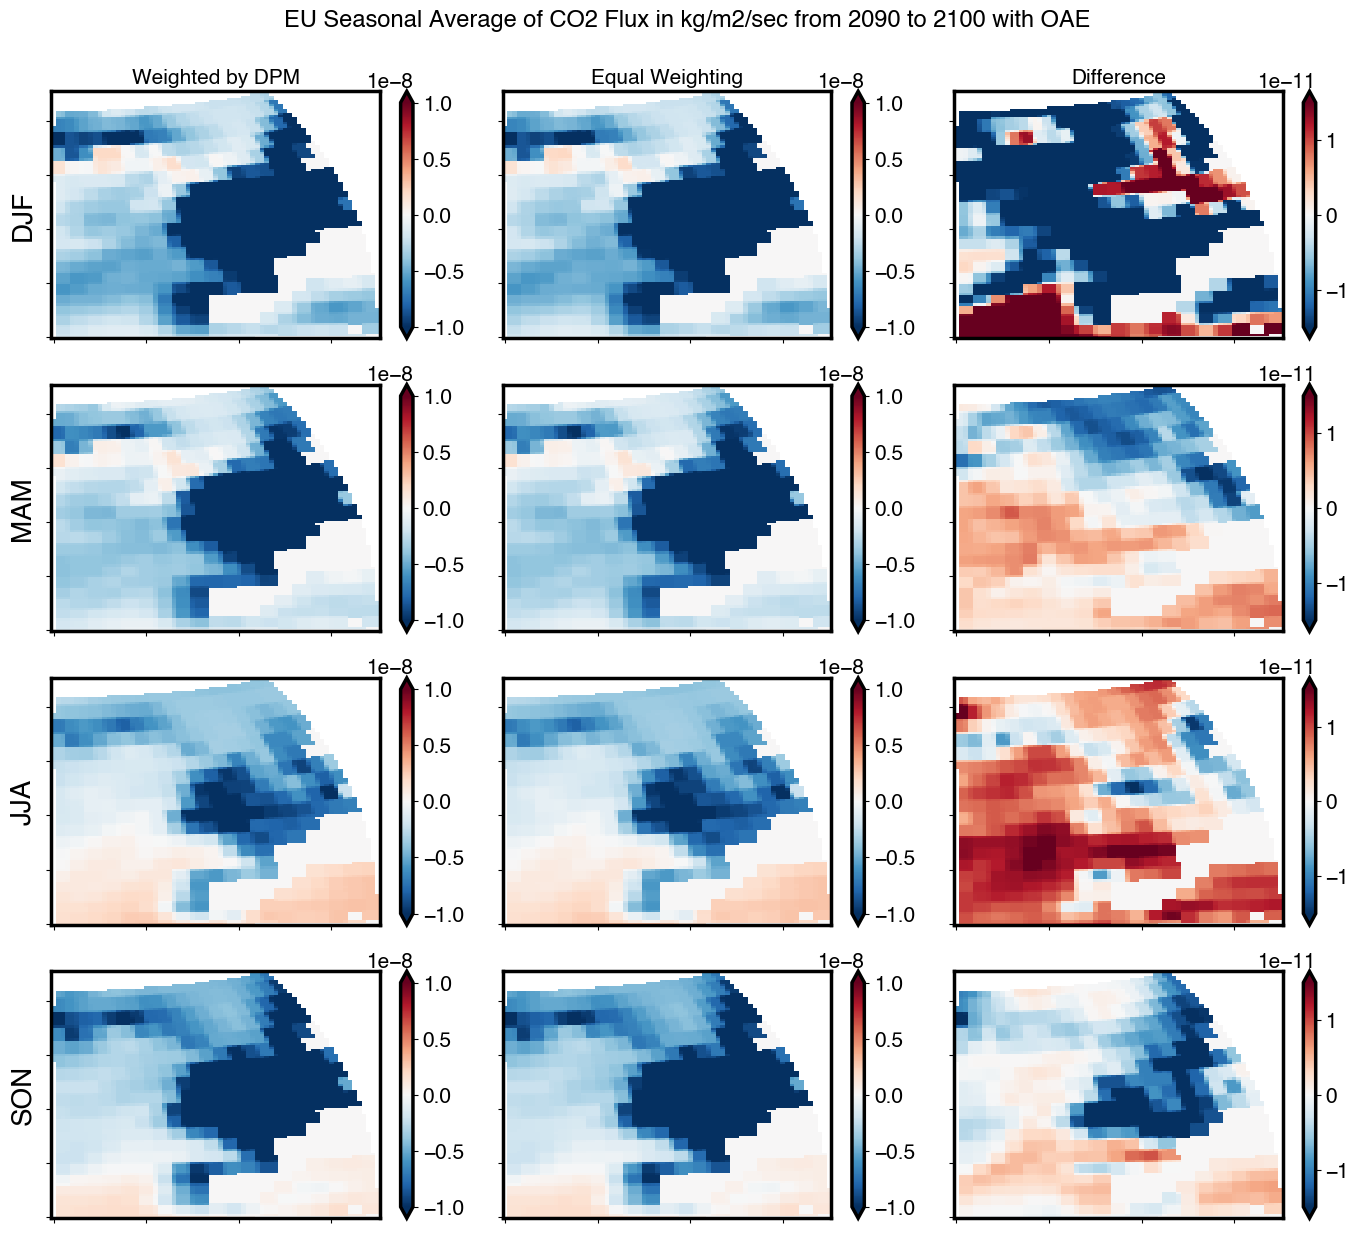

In [42]:
notnull = pd.notnull(ds_unweighted_baseline["co2flux_cpl"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-0.00000001,
        vmax=0.00000001,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["co2flux_cpl"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.000000000015,
        vmax=0.000000000015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of CO2 Flux in kg/m2/sec from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of CO2 Flux from 2090 to 2100 without OAE

In [43]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

co2flux_baseline_month = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [44]:
co2flux_month_summary_baseline = co2flux_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_baseline = co2flux_baseline_month.resample(time_counter='M', keep_attrs=True).mean()
co2flux_monthly_mean_baseline = co2flux_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [45]:
co2flux_oae_month = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date_month, end_date_month))

In [46]:
co2flux_month_summary_oae = co2flux_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_month_mean_all_years_oae = co2flux_oae_month.resample(time_counter='M', keep_attrs=True).mean()
co2flux_monthly_mean_oae = co2flux_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


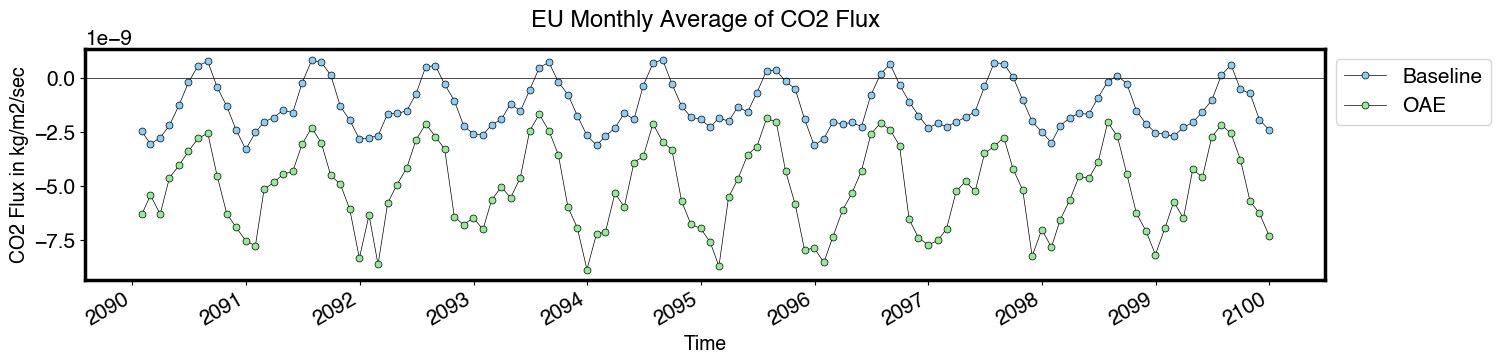

In [47]:
f, ax = plt.subplots(figsize=(16, 3))

co2flux_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of CO2 Flux", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux in kg/m2/sec", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### EU Monthly Average of CO2 Flux from 2090 to 2100 without OAE

In [48]:
co2flux_baseline_monthly = co2flux_monthly_mean_baseline.to_dataframe('CO2_Flux')
co2flux_baseline_monthly['Month'] = pd.DatetimeIndex(co2flux_baseline_monthly.index).month

In [49]:
conditions = [
    (co2flux_baseline_monthly['Month'] == 1),
    (co2flux_baseline_monthly['Month'] == 2),
    (co2flux_baseline_monthly['Month'] == 3),
    (co2flux_baseline_monthly['Month'] == 4),
    (co2flux_baseline_monthly['Month'] == 5),
    (co2flux_baseline_monthly['Month'] == 6),
    (co2flux_baseline_monthly['Month'] == 7),
    (co2flux_baseline_monthly['Month'] == 8),
    (co2flux_baseline_monthly['Month'] == 9),
    (co2flux_baseline_monthly['Month'] == 10),
    (co2flux_baseline_monthly['Month'] == 11),
    (co2flux_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_baseline_monthly['Month'] = np.select(conditions, values)

In [50]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

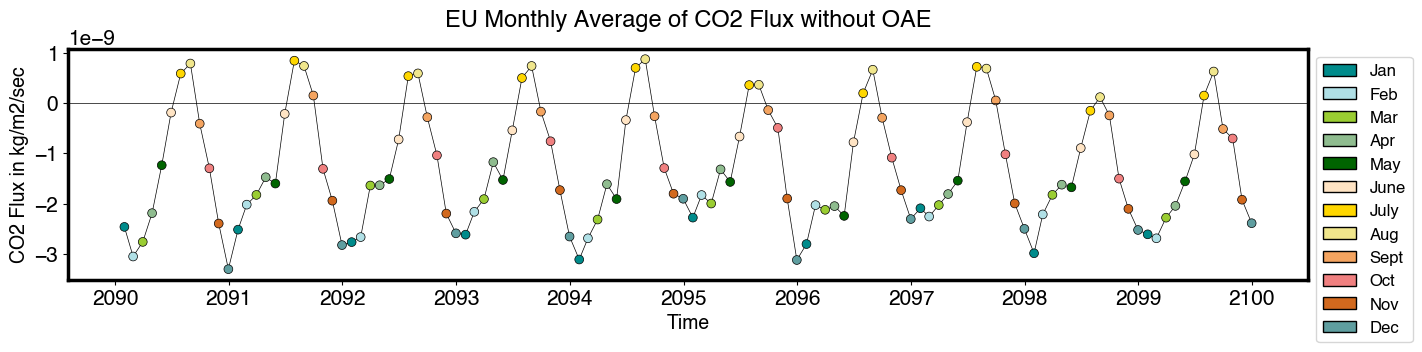

In [51]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("EU Monthly Average of CO2 Flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### EU Monthly Average of CO2 Flux from 2090 to 2100 with OAE

In [52]:
co2flux_oae_monthly = co2flux_monthly_mean_oae.to_dataframe('CO2_Flux')
co2flux_oae_monthly['Month'] = pd.DatetimeIndex(co2flux_oae_monthly.index).month

In [53]:
conditions = [
    (co2flux_oae_monthly['Month'] == 1),
    (co2flux_oae_monthly['Month'] == 2),
    (co2flux_oae_monthly['Month'] == 3),
    (co2flux_oae_monthly['Month'] == 4),
    (co2flux_oae_monthly['Month'] == 5),
    (co2flux_oae_monthly['Month'] == 6),
    (co2flux_oae_monthly['Month'] == 7),
    (co2flux_oae_monthly['Month'] == 8),
    (co2flux_oae_monthly['Month'] == 9),
    (co2flux_oae_monthly['Month'] == 10),
    (co2flux_oae_monthly['Month'] == 11),
    (co2flux_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

co2flux_oae_monthly['Month'] = np.select(conditions, values)

In [54]:
colors = dict(zip(co2flux_oae_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

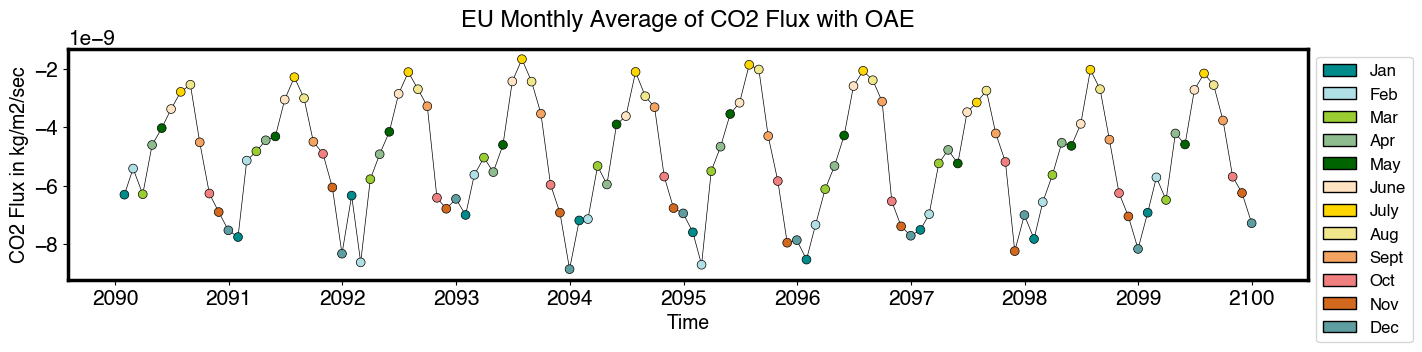

In [55]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("EU Monthly Average of CO2 Flux with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of CO2 Flux from 2090 to 2100 with and without OAE

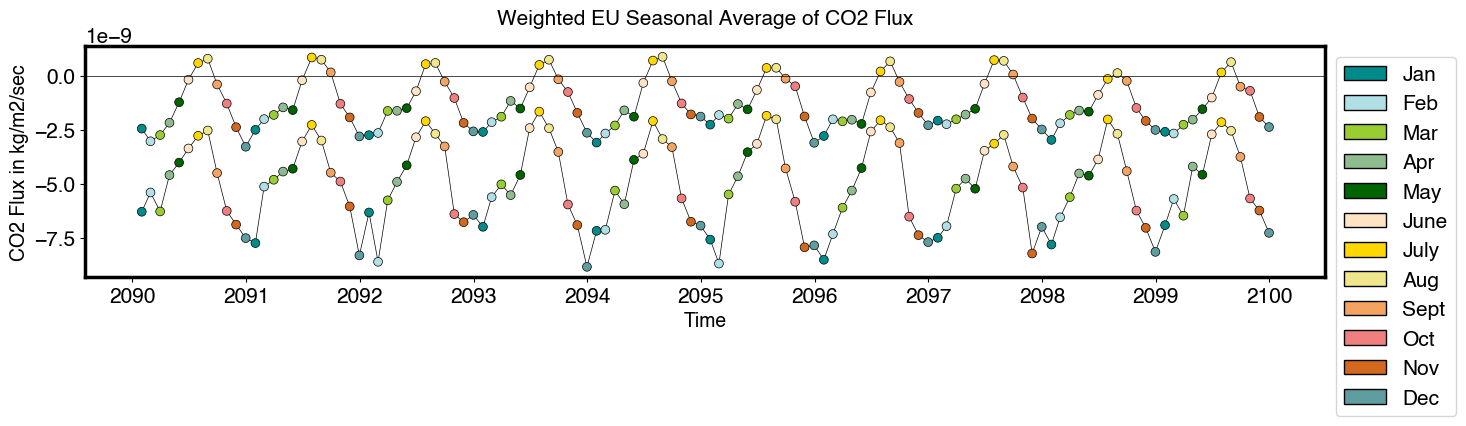

In [56]:
colors = dict(zip(co2flux_baseline_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_baseline_monthly.index, co2flux_baseline_monthly.CO2_Flux, color=co2flux_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(co2flux_oae_monthly.index, co2flux_oae_monthly.CO2_Flux, color=co2flux_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux in kg/m2/sec', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)
ax.axhline(0, color='black', linewidth=0.5)

pass

### CO2 Flux Annual Amplitude without OAE

In [57]:
sliced_data_baseline_minmax = sliced_data_baseline_plot.to_dataframe()
sliced_data_baseline_minmax = sliced_data_baseline_minmax.reset_index()

In [58]:
year_max_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmax().values]

In [59]:
year_min_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmin().values]

In [60]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [61]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [62]:
co2flux_amplitude_baseline = year_max_baseline['co2flux_cpl'] - year_min_baseline['co2flux_cpl']

In [63]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_xarray()

In [64]:
co2flux_amplitude_baseline = co2flux_amplitude_baseline.to_dataset()

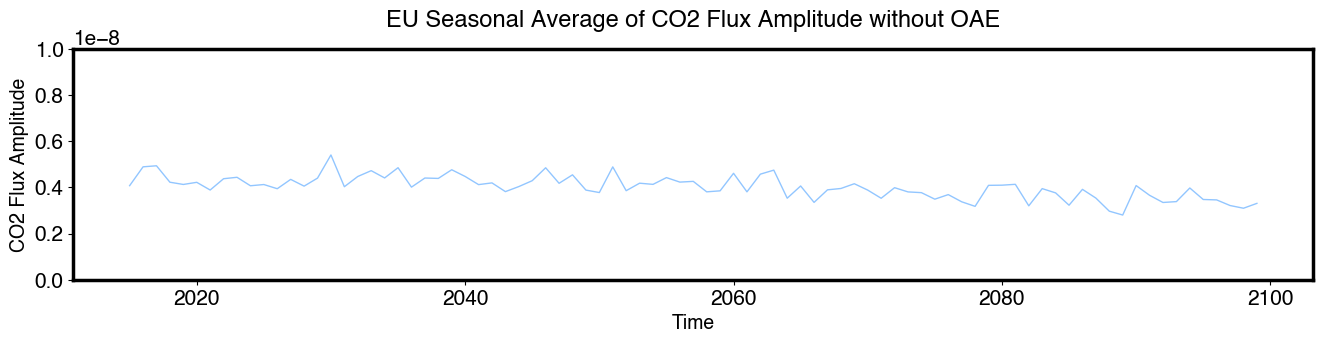

In [65]:
plt.figure(figsize=(16, 3))
plt.plot(co2flux_amplitude_baseline.year, co2flux_amplitude_baseline.co2flux_cpl, linewidth=1)
plt.ylim(0, 0.00000001)
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux Amplitude", fontsize=14)
plt.title('EU Seasonal Average of CO2 Flux Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### CO2 Flux Annual Amplitude with OAE

In [66]:
sliced_data_oae_minmax = sliced_data_oae_plot.to_dataframe()
sliced_data_oae_minmax = sliced_data_oae_minmax.reset_index()

In [67]:
year_max_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmax().values]

In [68]:
year_min_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['co2flux_cpl'].idxmin().values]

In [69]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [70]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [71]:
co2flux_amplitude_oae = year_max_oae['co2flux_cpl'] - year_min_oae['co2flux_cpl']

In [72]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_xarray()

In [73]:
co2flux_amplitude_oae = co2flux_amplitude_oae.to_dataset()

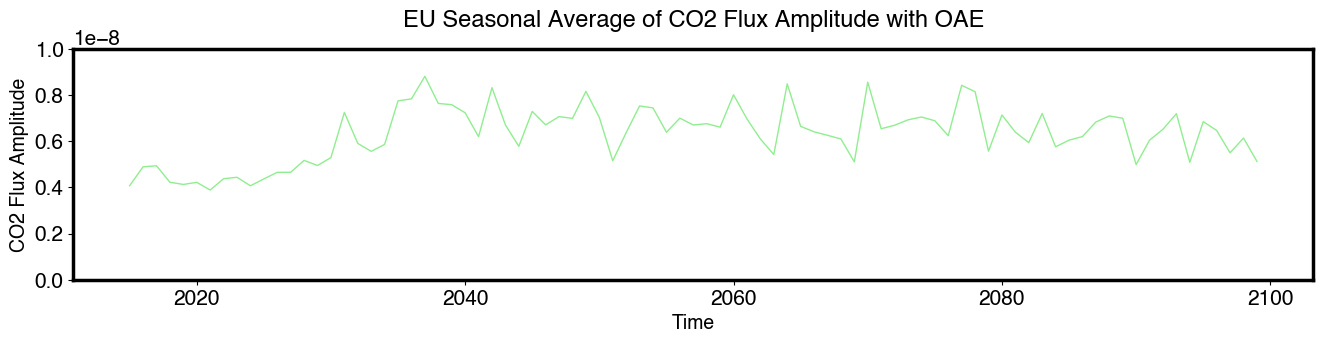

In [74]:
plt.figure(figsize=(16, 3))
plt.plot(co2flux_amplitude_oae.year, co2flux_amplitude_oae.co2flux_cpl, linewidth=1, color='lightgreen')
plt.ylim(0, 0.00000001)
plt.xlabel("Time", fontsize=14)
plt.ylabel("CO2 Flux Amplitude", fontsize=14)
plt.title('EU Seasonal Average of CO2 Flux Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### % Amplitude Change Over Time with and without OAE

In [75]:
co2flux_amplitude_baseline_pct = co2flux_amplitude_baseline.to_dataframe()
co2flux_amplitude_oae_pct = co2flux_amplitude_oae.to_dataframe()

In [76]:
co2flux_amplitude_baseline_pct = co2flux_amplitude_baseline_pct.pct_change()
co2flux_amplitude_oae_pct = co2flux_amplitude_oae_pct.pct_change()

In [77]:
co2flux_amplitude_baseline_pct = co2flux_amplitude_baseline_pct.to_xarray()
co2flux_amplitude_oae_pct = co2flux_amplitude_oae_pct.to_xarray()

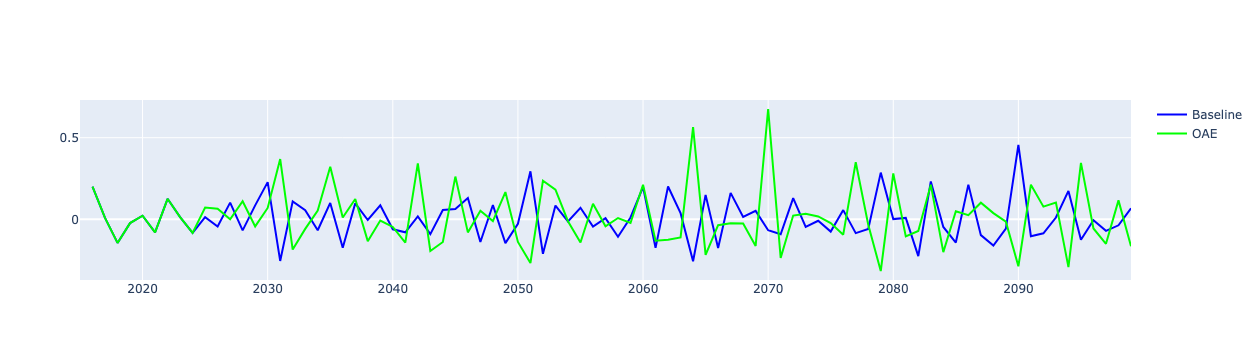

In [106]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=co2flux_amplitude_baseline_pct.year, y=co2flux_amplitude_baseline_pct['co2flux_cpl'],
                    mode='lines', line_color='#0000FF',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=co2flux_amplitude_oae_pct.year, y=co2flux_amplitude_oae_pct['co2flux_cpl'],
                    mode='lines', line_color='#00FF00',
                    name='OAE'))
fig.show()